In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


class EarthTemperatureSimulator:
    def __init__(self, latitude=0, target_average_temperature=25, min_temperature=-10, max_temperature=47, oscillation_factor=5, outlier_probability=0.05, outlier_magnitude=3):
        self.latitude = latitude
        self.target_average_temperature = target_average_temperature
        self.min_temperature = min_temperature
        self.max_temperature = max_temperature
        self.oscillation_factor = oscillation_factor
        self.outlier_probability = outlier_probability
        self.outlier_magnitude = outlier_magnitude

    def calculate_solar_declination(self, day_of_year):
        # Calculate solar declination angle
        return 23.45 * np.sin(2 * np.pi * (284 + day_of_year) / 365)

    def calculate_hourly_insolation(self, solar_declination, hour_of_day):
        # Calculate hourly insolation based on latitude and solar declination
        day_length = 2 * np.arccos(-np.tan(np.radians(self.latitude)) * np.tan(solar_declination)) / np.pi * 24
        hour_angle = 15 * (hour_of_day - 12)
        if -day_length / 2 < hour_angle < day_length / 2:
            insolation = 1361 * np.cos(np.radians(self.latitude)) * np.cos(np.radians(solar_declination)) \
                         * np.cos(np.radians(hour_angle))
        else:
            insolation = 0
        return insolation

    def add_outlier(self, temperature):
        # Introduce occasional outliers with smaller deviations
        if np.random.rand() < self.outlier_probability:
            return temperature + np.random.uniform(-self.outlier_magnitude, self.outlier_magnitude)
        else:
            return temperature

    def calculate_seasonal_variation(self, day_of_year):
        # Simulate seasonal temperature variation using a sinusoidal function
        return 10 * np.sin(2 * np.pi * (day_of_year - 80) / 365)

    def calculate_temperature(self, day_of_year, hour_of_day):
        # Simulate temperature using the Earth Energy Balance model with a target average temperature
        solar_declination = np.radians(self.calculate_solar_declination(day_of_year))
        insolation = self.calculate_hourly_insolation(solar_declination, hour_of_day)
        
        # Adjust the temperature calculation to force the time series to have a target average temperature
        temperature = (insolation / (4 * 5.67e-8)) ** 0.25 - 273.15
        temperature += (self.target_average_temperature - np.mean(temperature))
        temperature += self.calculate_seasonal_variation(day_of_year)
        temperature += self.oscillation_factor * np.sin(2 * np.pi * hour_of_day / 24)
        temperature = np.clip(temperature, self.min_temperature, self.max_temperature)
        
        # Add occasional outliers
        temperature = self.add_outlier(temperature)
        
        return temperature

    def simulate_temperature_for_days(self, num_days):
        # Simulate temperature for the specified number of days
        hours_of_day = np.arange(0, 24)
        temperatures_by_day = []
        time_series=[]
        mjds = []
        for day in range(1, num_days + 1):
            temperatures = [self.calculate_temperature(day, hour) for hour in hours_of_day]
            temperatures_by_day.append(temperatures)
            # temperatures = [self.calculate_temperature(day, hour) for hour in hours_of_day]
            time_series.extend([np.mean(temperatures)])
            mjds.append()
        return np.array(temperatures_by_day),np.array(time_series)

In [5]:
# Example of using the advanced simulator
latitude = 30  # Specify the latitude of the point on Earth
target_average_temperature = 25  # Specify the target average temperature
min_temperature = -10  # Specify the minimum temperature
max_temperature = 47  # Specify the maximum temperature
oscillation_factor = 5  # Specify the oscillation factor
outlier_probability = 0.05  # Specify the probability of having an outlier
outlier_magnitude = 3  # Specify the magnitude of the outliers

earth_simulator = EarthTemperatureSimulator(
    latitude, target_average_temperature, min_temperature, max_temperature,
    oscillation_factor, outlier_probability, outlier_magnitude
)
# Simulate temperature for 365 days
num_days_to_simulate = 366

In [7]:
temperature_data, time_series = earth_simulator.simulate_temperature_for_days(num_days_to_simulate)

TypeError: list.append() takes exactly one argument (0 given)

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(temperature_data, cmap='coolwarm', aspect='auto', extent=[0, 24, 0, num_days_to_simulate])
ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day')
cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()

In [2]:
from datetime import datetime, timedelta

# ... (existing code)

class EarthTemperatureSimulator:
    def __init__(self, latitude=0, target_average_temperature=25, min_temperature=-10, max_temperature=47, oscillation_factor=5, outlier_probability=0.05, outlier_magnitude=3):
        self.latitude = latitude
        self.target_average_temperature = target_average_temperature
        self.min_temperature = min_temperature
        self.max_temperature = max_temperature
        self.oscillation_factor = oscillation_factor
        self.outlier_probability = outlier_probability
        self.outlier_magnitude = outlier_magnitude

    def calculate_solar_declination(self, day_of_year):
        # Calculate solar declination angle
        return 23.45 * np.sin(2 * np.pi * (284 + day_of_year) / 365)
    
    def calculate_hourly_insolation(self, solar_declination, hour_of_day):
        # Calculate hourly insolation based on latitude and solar declination
        day_length = 2 * np.arccos(-np.tan(np.radians(self.latitude)) * np.tan(solar_declination)) / np.pi * 24
        hour_angle = 15 * (hour_of_day - 12)
        if -day_length / 2 < hour_angle < day_length / 2:
            insolation = 1361 * np.cos(np.radians(self.latitude)) * np.cos(np.radians(solar_declination)) \
                         * np.cos(np.radians(hour_angle))
        else:
            insolation = 0
        return insolation
    
    def add_outlier(self, temperature):
        # Introduce occasional outliers with smaller deviations
        if np.random.rand() < self.outlier_probability:
            return temperature + np.random.uniform(-self.outlier_magnitude, self.outlier_magnitude)
        else:
            return temperature
        
    def calculate_seasonal_variation(self, day_of_year):
        # Simulate seasonal temperature variation using a sinusoidal function
        return 10 * np.sin(2 * np.pi * (day_of_year - 80) / 365)
    
    def calculate_modified_julian_date(self, year, month, day, hour=0):
        # Create a datetime object for the given date and time
        date_time = datetime(year, month, day, hour)

        # Calculate the Julian Date
        julian_date = date_time.toordinal() + 1721425.5

        # Calculate the Modified Julian Date
        modified_julian_date = julian_date - 2400000.5

        return modified_julian_date

    def calculate_modified_julian_seconds(self, mjd, hour_of_day):
        # Calculate Modified Julian Seconds for a given MJD and hour of day
        mjs = (mjd - int(mjd)) * 86400  # Convert fractional days to seconds
        mjs += hour_of_day * 3600  # Add the hour of day in seconds
        return mjs

    def simulate_temperature_for_days(self, num_days, start_date):
        # Extract start date components
        start_year, start_month, start_day, start_hour = start_date

        # Simulate temperature for the specified number of days
        hours_of_day = np.arange(0, 24)
        temperatures_by_day = []
        time_series = []
        mjds = []

        for day in range(1, num_days + 1):
            temperatures = [self.calculate_temperature(day, hour) for hour in hours_of_day]
            temperatures_by_day.append(temperatures)

            # Calculate the Modified Julian Date for the current day
            mjd = self.calculate_modified_julian_date(start_year, start_month, start_day + day - 1, start_hour)
            mjds.append(mjd)

            # Calculate and append the daily mean temperature to the time series
            time_series.append(np.mean(temperatures))

        return np.array(temperatures_by_day), np.array(time_series), np.array(mjds)

    def calculate_temperature(self, day_of_year, hour_of_day):
        # Simulate temperature based on Modified Julian Seconds
        # Simulate temperature using the Earth Energy Balance model with a target average temperature
        solar_declination = np.radians(self.calculate_solar_declination(day_of_year))
        insolation = self.calculate_hourly_insolation(solar_declination, hour_of_day)
        
        # Adjust the temperature calculation to force the time series to have a target average temperature
        temperature = (insolation / (4 * 5.67e-8)) ** 0.25 - 273.15
        temperature += (self.target_average_temperature - np.mean(temperature))
        temperature += self.calculate_seasonal_variation(day_of_year)
        temperature += self.oscillation_factor * np.sin(2 * np.pi * hour_of_day / 24)
        temperature = np.clip(temperature, self.min_temperature, self.max_temperature)

        # Add occasional outliers
        temperature = self.add_outlier(temperature)

        return temperature


# Example of using the advanced simulator
# ... (existing code)

# Simulate temperature for 365 days starting from January 1, 2023, 00:00
start_date = (2023, 1, 1, 0)
temperature_data, time_series, mjds = earth_simulator.simulate_temperature_for_days(num_days_to_simulate, start_date)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(temperature_data, cmap='coolwarm', aspect='auto', extent=[0, 24, 0, num_days_to_simulate])
ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day')
cbar = fig.colorbar(cax, label='Temperature (°C)')

# Plot the Modified Julian Dates on the secondary y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Modified Julian Date', color='tab:blue')
ax2.plot(np.arange(num_days_to_simulate), mjds, color='tab:blue', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.show()


TypeError: EarthTemperatureSimulator.simulate_temperature_for_days() takes 2 positional arguments but 3 were given

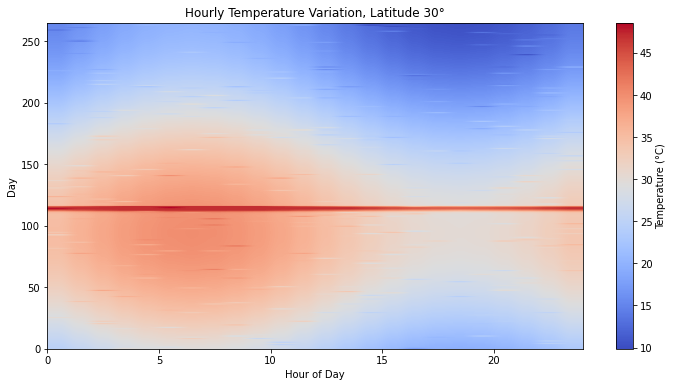

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ForestFireTemperatureSimulator:
    def __init__(self, 
                 latitude=0, 
                 target_average_temperature=25, 
                 min_temperature=-10, 
                 max_temperature=47, 
                 oscillation_factor=5, 
                 outlier_probability=0.05, 
                 outlier_magnitude=3, 
                 fire_start_day=150, 
                 fire_duration_days=11, 
                 fire_magnitude=15, 
                 fire_smoothness=3):
        self.latitude = latitude
        self.target_average_temperature = target_average_temperature
        self.min_temperature = min_temperature
        self.max_temperature = max_temperature
        self.oscillation_factor = oscillation_factor
        self.outlier_probability = outlier_probability
        self.outlier_magnitude = outlier_magnitude
        self.fire_start_day = fire_start_day
        self.fire_duration_days = fire_duration_days
        self.fire_magnitude = fire_magnitude
        self.fire_smoothness = fire_smoothness

    def calculate_solar_declination(self, day_of_year):
        # Calculate solar declination angle
        return 23.45 * np.sin(2 * np.pi * (284 + day_of_year) / 365)

    def calculate_hourly_insolation(self, solar_declination, hour_of_day):
        # Calculate hourly insolation based on latitude and solar declination
        day_length = 2 * np.arccos(-np.tan(np.radians(self.latitude)) * np.tan(solar_declination)) / np.pi * 24
        hour_angle = 15 * (hour_of_day - 12)
        if -day_length / 2 < hour_angle < day_length / 2:
            insolation = 1361 * np.cos(np.radians(self.latitude)) * np.cos(np.radians(solar_declination)) \
                         * np.cos(np.radians(hour_angle))
        else:
            insolation = 0
        return insolation

    def add_outlier(self, temperature):
        # Introduce occasional outliers with smaller deviations
        if np.random.rand() < self.outlier_probability:
            return temperature + np.random.uniform(-self.outlier_magnitude, self.outlier_magnitude)
        else:
            return temperature

    def calculate_seasonal_variation(self, day_of_year):
        # Simulate seasonal temperature variation using a sinusoidal function
        return 10 * np.sin(2 * np.pi * (day_of_year - 80) / 365)

    def calculate_fire_effect(self, day):
        # Simulate the effect of a forest fire on temperature with a smoother spike
        if self.fire_start_day <= day < self.fire_start_day + self.fire_duration_days:
            fire_days = np.arange(0, self.fire_duration_days)
            fire_spike = self.fire_magnitude * np.exp(-(fire_days - self.fire_smoothness / 2) ** 2 / (2 * (self.fire_smoothness / 2) ** 2))
            return fire_spike[day - self.fire_start_day]
        else:
            return 0

    def calculate_temperature(self, day_of_year, hour_of_day):
        # Simulate temperature using the Earth Energy Balance model with a target average temperature
        solar_declination = np.radians(self.calculate_solar_declination(day_of_year))
        insolation = self.calculate_hourly_insolation(solar_declination, hour_of_day)
        
        # Adjust the temperature calculation to force the time series to have a target average temperature
        temperature = (insolation / (4 * 5.67e-8)) ** 0.25 - 273.15
        temperature += (self.target_average_temperature - np.mean(temperature))
        temperature += self.calculate_seasonal_variation(day_of_year)
        temperature += self.oscillation_factor * np.sin(2 * np.pi * hour_of_day / 24)
        temperature += self.calculate_fire_effect(day_of_year)
        temperature = np.clip(temperature, self.min_temperature, self.max_temperature)
        
        # Add occasional outliers
        temperature = self.add_outlier(temperature)
        
        return temperature

    def simulate_temperature_for_days(self, num_days):
        # Simulate temperature for the specified number of days
        hours_of_day = np.arange(0, 24)
        temperatures_by_day = []
        time_series=[]
        for day in range(1, num_days + 1):
            temperatures = [self.calculate_temperature(day, hour) for hour in hours_of_day]
            temperatures_by_day.append(temperatures)
            time_series.append(np.mean(temperatures))

        return np.array(temperatures_by_day),np.array(time_series)

# Example of using the advanced simulator with a forest fire
latitude = 30  # Specify the latitude of the point on Earth
target_average_temperature = 25  # Specify the target average temperature
min_temperature = -10  # Specify the minimum temperature
max_temperature = 47  # Specify the maximum temperature
oscillation_factor = 5  # Specify the oscillation factor
outlier_probability = 0.05  # Specify the probability of having an outlier
outlier_magnitude = 3  # Specify the magnitude of the outliers
fire_start_day = 150  # Specify the day when the forest fire starts (during summer)
fire_duration_days = 11  # Specify the duration of the forest fire
fire_magnitude = 15  # Specify the magnitude of the temperature spike during the fire
fire_smoothness = 3  # Specify the smoothness of the fire spike

forest_fire_simulator = ForestFireTemperatureSimulator(
    latitude, target_average_temperature, min_temperature, max_temperature,
    oscillation_factor, outlier_probability, outlier_magnitude,
    fire_start_day, fire_duration_days, fire_magnitude, fire_smoothness
)

# Simulate temperature for 265 days
num_days_to_simulate = 265
temperature_data,time_series = forest_fire_simulator.simulate_temperature_for_days(num_days_to_simulate)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(temperature_data, cmap='coolwarm', aspect='auto', extent=[0, 24, 0, num_days_to_simulate])
ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day')
cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()


In [20]:
import numpy as np

class StreamingZScoreOutlierDetector:
    def __init__(self, window_size=100, threshold=3.0):
        self.window_size = window_size
        self.threshold = threshold
        self.data = []

    def update_model(self, observation):
        self.data.append(observation)

        if len(self.data) > self.window_size:
            # Remove oldest data points if exceeding window size
            self.data.pop(0)

    def calculate_z_score(self, observation):
        mean = np.mean(self.data)
        std_dev = np.std(self.data, ddof=1)  # ddof=1 for sample standard deviation
        if std_dev == 0:
            return 0  # Avoid division by zero if all values are identical
        z_score = (observation - mean) / std_dev
        return z_score

    def detect_outlier(self, observation):
        z_score = self.calculate_z_score(observation)
        return abs(z_score) > self.threshold

# Example usage:
streaming_zscore_detector = StreamingZScoreOutlierDetector(window_size=100, threshold=3.0)

# Simulate streaming data
for epoch in range(1, 5001):
    observation = np.random.normal(loc=0, scale=1)  # Simulated observation, replace with your actual data
    streaming_zscore_detector.update_model(observation)

    if epoch % 50 == 0:
        # Print whether the current epoch is an outlier based on z-scores
        is_outlier = streaming_zscore_detector.detect_outlier(observation)
        print(f"Epoch {epoch}: Is Outlier = {is_outlier}")
        


Epoch 50: Is Outlier = False
Epoch 100: Is Outlier = False
Epoch 150: Is Outlier = False
Epoch 200: Is Outlier = False
Epoch 250: Is Outlier = False
Epoch 300: Is Outlier = False
Epoch 350: Is Outlier = False
Epoch 400: Is Outlier = False
Epoch 450: Is Outlier = False
Epoch 500: Is Outlier = False
Epoch 550: Is Outlier = False
Epoch 600: Is Outlier = False
Epoch 650: Is Outlier = False
Epoch 700: Is Outlier = False
Epoch 750: Is Outlier = False
Epoch 800: Is Outlier = False
Epoch 850: Is Outlier = False
Epoch 900: Is Outlier = False
Epoch 950: Is Outlier = False
Epoch 1000: Is Outlier = False
Epoch 1050: Is Outlier = False
Epoch 1100: Is Outlier = False
Epoch 1150: Is Outlier = False
Epoch 1200: Is Outlier = False
Epoch 1250: Is Outlier = False
Epoch 1300: Is Outlier = False
Epoch 1350: Is Outlier = False
Epoch 1400: Is Outlier = False
Epoch 1450: Is Outlier = False
Epoch 1500: Is Outlier = False
Epoch 1550: Is Outlier = False
Epoch 1600: Is Outlier = False
Epoch 1650: Is Outlier = Fal

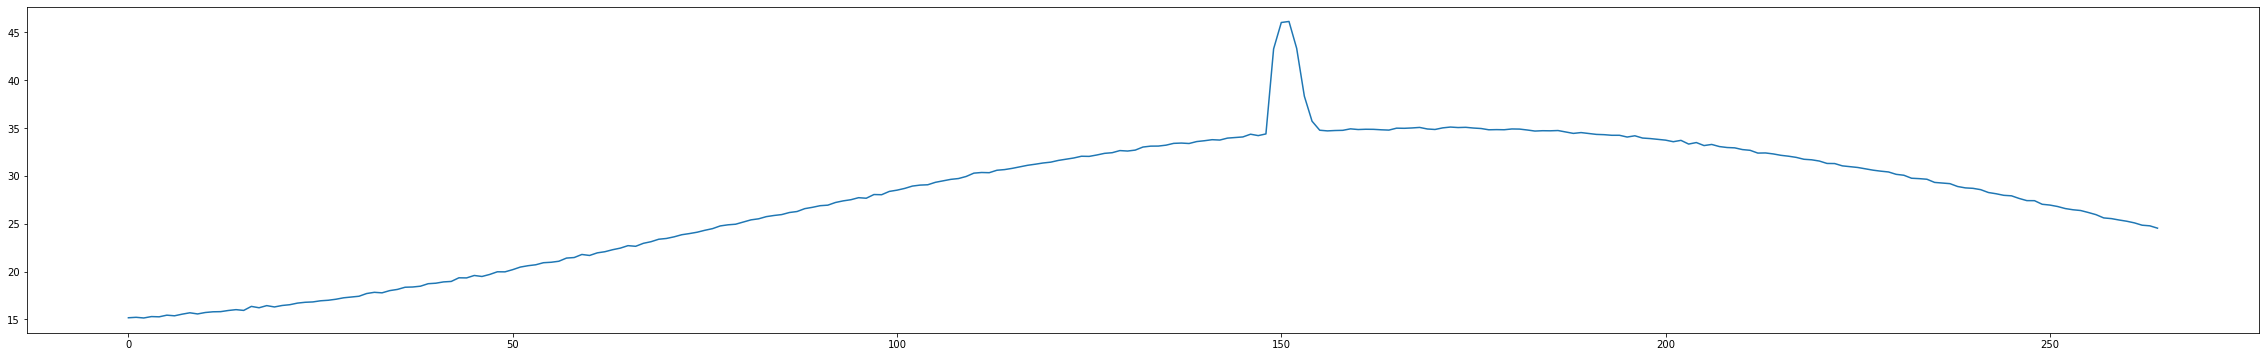

In [47]:
# Plotting
fig, ax = plt.subplots(figsize=(40, 6))
cax = ax.plot(time_series)
plt.show()

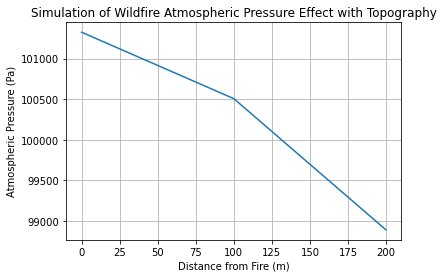

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wildfire_pressure_effect(distance, fire_intensity, duration, time_step, max_distance, elevation_profile):
    # Constants
    gas_constant = 287.05  # J/(kg·K)
    lapse_rate = 0.0065  # K/m (standard lapse rate)

    # Initial conditions
    temperature = 288.15  # Standard temperature at sea level (15°C)
    pressure = 101325.0  # Standard atmospheric pressure at sea level (Pa)

    # Arrays to store data for plotting
    distances = [0]
    pressures = [pressure]

    # Simulation loop
    current_distance = 0
    while current_distance < max_distance:
        # Calculate temperature change due to the fire
        temperature_change = fire_intensity / gas_constant

        # Update temperature using lapse rate
        temperature -= lapse_rate * current_distance * time_step

        # Update pressure using ideal gas law
        pressure = pressure * (temperature_change + 1) ** (-current_distance * lapse_rate / gas_constant)

        # Calculate vertical displacement due to elevation change
        elevation_displacement = elevation_profile(current_distance) * lapse_rate

        # Adjust pressure for elevation change
        pressure *= np.exp(-elevation_displacement / (gas_constant * temperature))

        # Store data for plotting
        distances.append(current_distance)
        pressures.append(pressure)

        # Move to the next distance
        current_distance += distance

    return distances, pressures

# Define an example elevation profile function
def elevation_profile(distance):
    # Example elevation profile: a simple linear slope
    return 0.1 * distance

# Simulation parameters
fire_distance = 100  # Distance from the fire (m)
fire_intensity = 10000  # Intensity of the fire (arbitrary units)
simulation_duration = 3600  # Duration of the simulation (seconds)
time_step = 60  # Time step for simulation (seconds)
max_simulation_distance = 300  # Maximum distance for the simulation (meters)

# Run simulation
distances, pressures = simulate_wildfire_pressure_effect(fire_distance, fire_intensity, simulation_duration, time_step, max_simulation_distance, elevation_profile)

# Plotting
plt.plot(distances, pressures)
plt.title('Simulation of Wildfire Atmospheric Pressure Effect with Topography')
plt.xlabel('Distance from Fire (m)')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.grid(True)
plt.show()


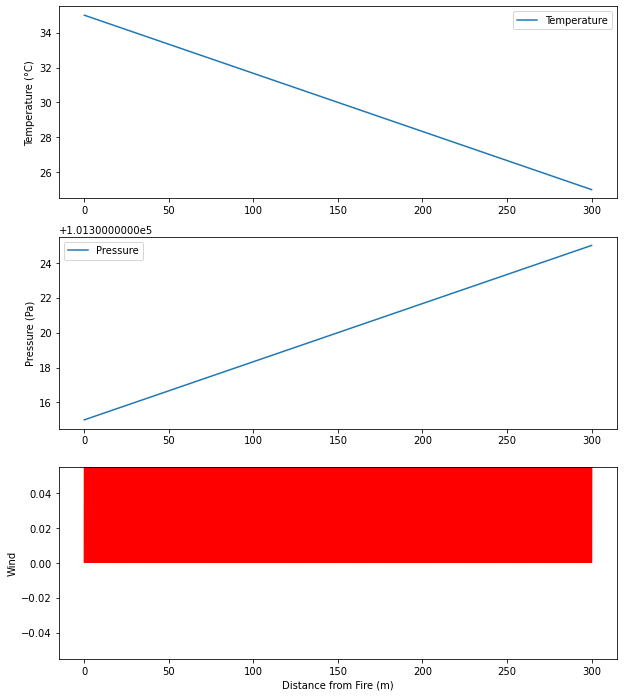

In [54]:
import numpy as np
import matplotlib.pyplot as plt

class WildfireSensorSimulation:
    def __init__(self, fire_intensity, max_distance, sensor_distance):
        self.fire_intensity = fire_intensity
        self.max_distance = max_distance
        self.sensor_distance = sensor_distance

    def simulate_wildfire_effects(self):
        distances = np.linspace(0, self.max_distance, 1000)
        temperatures = self.calculate_temperature_profile(distances)
        pressures = self.calculate_pressure_profile(distances)
        winds = self.calculate_wind_profile(distances)

        return distances, temperatures, pressures, winds

    def calculate_temperature_profile(self, distances):
        # Linear temperature increase near the fire
        temperature_increase = self.fire_intensity * (1 - distances / self.max_distance)
        return 25 + temperature_increase  # Assume initial temperature is 25°C

    def calculate_pressure_profile(self, distances):
        # Pressure decrease near the fire
        pressure_decrease = self.fire_intensity * (1 - distances / self.max_distance)
        return 101325 - pressure_decrease  # Assume initial pressure is 101325 Pa

    def calculate_wind_profile(self, distances):
        # Basic representation of wind patterns
        wind_speed = 5  # Constant wind speed for illustration
        wind_direction = np.pi / 4  # Wind blowing at a 45-degree angle from the fire
        wind_components = wind_speed * np.array([np.cos(wind_direction), np.sin(wind_direction)])
        return wind_components

    def plot_simulation_results(self, distances, temperatures, pressures, winds):
        # Plotting
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

        ax1.plot(distances, temperatures, label='Temperature')
        ax1.set_ylabel('Temperature (°C)')
        ax1.legend()

        ax2.plot(distances, pressures, label='Pressure')
        ax2.set_ylabel('Pressure (Pa)')
        ax2.legend()

        ax3.quiver(distances, np.zeros_like(distances), winds[0], winds[1], scale=10, scale_units='xy', angles='xy', color='r')
        ax3.set_ylabel('Wind')
        ax3.set_xlabel('Distance from Fire (m)')

        plt.show()

# Simulation parameters
fire_intensity = 10  # Intensity of the fire (arbitrary units)
max_distance = 300  # Maximum distance for the simulation (meters)
sensor_distance = 50  # Distance of the sensor from the fire (meters)

# Run simulation
simulation = WildfireSensorSimulation(fire_intensity, max_distance, sensor_distance)
distances, temperatures, pressures, winds = simulation.simulate_wildfire_effects()

# Plot results
simulation.plot_simulation_results(distances, temperatures, pressures, winds)


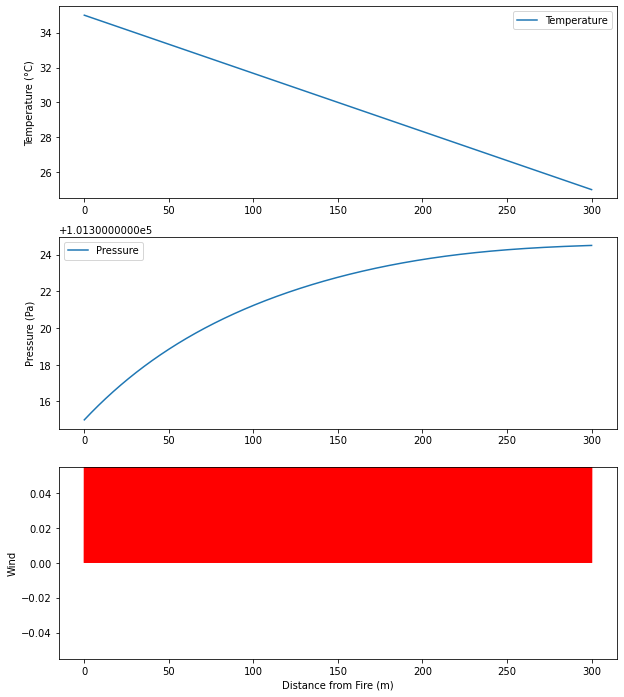

In [56]:
import numpy as np
import matplotlib.pyplot as plt

class WildfireSensorSimulation:
    def __init__(self, fire_intensity, max_distance, sensor_distance):
        self.fire_intensity = fire_intensity
        self.max_distance = max_distance
        self.sensor_distance = sensor_distance

    def simulate_wildfire_effects(self):
        distances = np.linspace(0, self.max_distance, 1000)
        temperatures = self.calculate_temperature_profile(distances)
        pressures = self.calculate_pressure_profile(distances)
        winds = self.calculate_wind_profile(distances)

        return distances, temperatures, pressures, winds

    def calculate_temperature_profile(self, distances):
        # Linear temperature increase near the fire
        temperature_increase = self.fire_intensity * (1 - distances / self.max_distance)
        return 25 + temperature_increase  # Assume initial temperature is 25°C

    def calculate_pressure_profile(self, distances):
        # Complex pressure profile incorporating heat release, wind, and distance
        base_pressure = 101325  # Assume initial pressure is 101325 Pa

        # Pressure decrease due to heat release from the fire
        pressure_decrease_heat = self.fire_intensity * np.exp(-distances / (2 * self.sensor_distance))

        # Pressure decrease due to wind patterns (simple representation)
        wind_influence = 0.1 * np.sin(distances / self.max_distance * 2 * np.pi)

        # Combine the effects
        pressure_profile = base_pressure - pressure_decrease_heat - wind_influence

        return np.maximum(pressure_profile, 95000)  # Clip to a minimum value for stability

    def calculate_wind_profile(self, distances):
        # Basic representation of wind patterns
        wind_speed = 5  # Constant wind speed for illustration
        wind_direction = np.pi / 4  # Wind blowing at a 45-degree angle from the fire
        wind_components = wind_speed * np.array([np.cos(wind_direction), np.sin(wind_direction)])
        return wind_components

    def plot_simulation_results(self, distances, temperatures, pressures, winds):
        # Plotting
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

        ax1.plot(distances, temperatures, label='Temperature')
        ax1.set_ylabel('Temperature (°C)')
        ax1.legend()

        ax2.plot(distances, pressures, label='Pressure')
        ax2.set_ylabel('Pressure (Pa)')
        ax2.legend()

        ax3.quiver(distances, np.zeros_like(distances), winds[0], winds[1], scale=10, scale_units='xy', angles='xy', color='r')
        ax3.set_ylabel('Wind')
        ax3.set_xlabel('Distance from Fire (m)')

        plt.show()

# Simulation parameters
fire_intensity = 10  # Intensity of the fire (arbitrary units)
max_distance = 300  # Maximum distance for the simulation (meters)
sensor_distance = 50  # Distance of the sensor from the fire (meters)

# Run simulation
simulation = WildfireSensorSimulation(fire_intensity, max_distance, sensor_distance)
distances, temperatures, pressures, winds = simulation.simulate_wildfire_effects()

# Plot results
simulation.plot_simulation_results(distances, temperatures, pressures, winds)


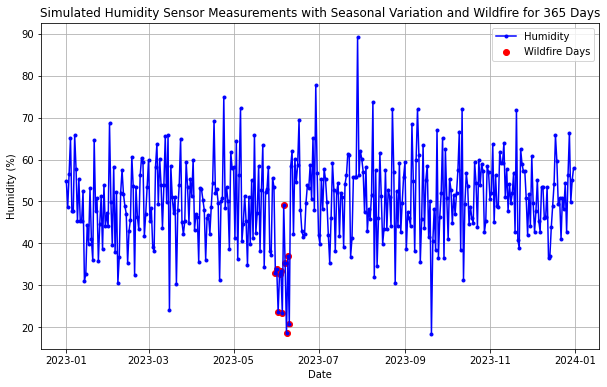

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Set seed for reproducibility
np.random.seed(42)

# Define parameters
days = 365
humidity_mean = 50  # Mean humidity
humidity_std_dev = 10  # Standard deviation of humidity readings
seasonal_amplitude = 10  # Amplitude of seasonal variation
seasonal_period = 365  # Period of seasonal variation in days
wildfire_start_day = 150  # Day when the wildfire starts
wildfire_duration = 11  # Duration of the wildfire in days

# Generate dates for 365 days
start_date = datetime.date(2023, 1, 1)
dates = [start_date + datetime.timedelta(days=i) for i in range(days)]

# Generate synthetic humidity data with seasonal variation and wildfire impact
time = np.linspace(0, 2 * np.pi, days)  # Time values for one year
seasonal_variation = seasonal_amplitude * np.sin(2 * np.pi * time / seasonal_period)

# Simulate wildfire impact
wildfire_impact = np.zeros(days)
wildfire_impact[wildfire_start_day:wildfire_start_day + wildfire_duration] = -20  # Humidity drop during wildfire

# Combine seasonal variation, wildfire impact, and random humidity values
humidity_values = (
    np.random.normal(loc=humidity_mean, scale=humidity_std_dev, size=days)
    + seasonal_variation
    + wildfire_impact
)

# Clip values to ensure they are within a valid range (e.g., 0 to 100)
humidity_values = np.clip(humidity_values, 0, 100)

# Plot the simulated data
plt.figure(figsize=(10, 6))
plt.plot(dates, humidity_values, marker='.', linestyle='-', color='b', label='Humidity')
plt.scatter(
    dates[wildfire_start_day:wildfire_start_day + wildfire_duration],
    humidity_values[wildfire_start_day:wildfire_start_day + wildfire_duration],
    color='r',
    label='Wildfire Days'
)
plt.title('Simulated Humidity Sensor Measurements with Seasonal Variation and Wildfire for 365 Days')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.show()
